<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/tf/c3_w4_preparing_sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing Text Sequences for Processing

In [13]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
#@title ### Setup Data
#@markdown Defining a long string to parse.
data="""In the town of Athy one Jeremy Lanigan
Battered away til he hadnt a pound.
His father died and made him a man again 
Left him a farm and ten acres of ground.
He gave a grand party for friends and relations 
Who didnt forget him when come to the wall, 
And if youll but listen Ill make your eyes glisten 
Of the rows and the ructions of Lanigans Ball. 
Myself to be sure got free invitation, 
For all the nice girls and boys I might ask, 
And just in a minute both friends and relations 
Were dancing round merry as bees round a cask. 
Judy ODaly, that nice little milliner, 
She tipped me a wink for to give her a call, 
And I soon arrived with Peggy McGilligan 
Just in time for Lanigans Ball. 
There were lashings of punch and wine for the ladies, 
Potatoes and cakes; there was bacon and tea, 
There were the Nolans, Dolans, OGradys 
Courting the girls and dancing away. 
Songs they went round as plenty as water, 
The harp that once sounded in Taras old hall,
Sweet Nelly Gray and The Rat Catchers Daughter,
All singing together at Lanigans Ball. 
They were doing all kinds of nonsensical polkas 
All round the room in a whirligig. 
Julia and I, we banished their nonsense 
And tipped them the twist of a reel and a jig. 
Ach mavrone, how the girls got all mad at me 
Danced til youd think the ceiling would fall. 
For I spent three weeks at Brooks Academy 
Learning new steps for Lanigans Ball. 
Three long weeks I spent up in Dublin, 
Three long weeks to learn nothing at all,
Three long weeks I spent up in Dublin, 
Learning new steps for Lanigans Ball. 
She stepped out and I stepped in again,
I stepped out and she stepped in again, 
She stepped out and I stepped in again, 
Learning new steps for Lanigans Ball. 
Boys were all merry and the girls they were hearty 
And danced all around in couples and groups, 
Til an accident happened, young Terrance McCarthy 
Put his right leg through miss Finnertys hoops. 
Poor creature fainted and cried Meelia murther, 
Called for her brothers and gathered them all. 
Carmody swore that hed go no further 
Til he had satisfaction at Lanigans Ball. 
In the midst of the row miss Kerrigan fainted, 
Her cheeks at the same time as red as a rose. 
Some of the lads declared she was painted, 
She took a small drop too much, I suppose. 
Her sweetheart, Ned Morgan, so powerful and able,
When he saw his fair colleen stretched out by the wall,
Tore the left leg from under the table
And smashed all the Chaneys at Lanigans Ball.
Boys, oh boys, twas then there were runctions.
Myself got a lick from big Phelim McHugh.
I soon replied to his introduction
And kicked up a terrible hullabaloo.
Old Casey, the piper, was near being strangled.
They squeezed up his pipes, bellows, chanters and all.
The girls, in their ribbons, they got all entangled
And that put an end to Lanigans Ball.
"""
print("len(data) ->", len(data))

len(data) -> 2827


In [3]:
tokenizer = Tokenizer()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print([t for t in tokenizer.word_index.items()][:5], '...')
print(total_words)

[('and', 1), ('the', 2), ('a', 3), ('in', 4), ('all', 5)] ...
263


In [14]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[: i + 1]
        input_sequences.append(n_gram_sequence)
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(
    pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre")
)

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = to_categorical(labels, num_classes=total_words)

In [15]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [17]:
xs[6], ys[6]

(array([ 0,  0,  0,  4,  2, 66,  8, 67, 68, 69], dtype=int32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

In [18]:
xs[5], ys[5]

(array([ 0,  0,  0,  0,  4,  2, 66,  8, 67, 68], dtype=int32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

In [20]:
model = Sequential([
    Embedding(total_words, 64, input_length=max_sequence_len + 1),
    Bidirectional(LSTM(20)),
    Dense(total_words, activation='softmax')
])
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [21]:
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 3s 8ms/step - loss: 5.5705 - accuracy: 0.0139
Epoch 2/500
15/15 [==============================] - 0s 7ms/step - loss: 5.5516 - accuracy: 0.0350
Epoch 3/500
15/15 [==============================] - 0s 7ms/step - loss: 5.5097 - accuracy: 0.0446
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 5.3755 - accuracy: 0.0648
Epoch 5/500
15/15 [==============================] - 0s 7ms/step - loss: 5.1316 - accuracy: 0.0430
Epoch 6/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0555 - accuracy: 0.0412
Epoch 7/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0647 - accuracy: 0.0537
Epoch 8/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0210 - accuracy: 0.0457
Epoch 9/500
15/15 [==============================] - 0s 8ms/step - loss: 4.9960 - accuracy: 0.0590
Epoch 10/500
15/15 [==============================] - 0s 9ms/step - loss: 4.9807 - accuracy: 0.0569
Epoch 11/

In [24]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

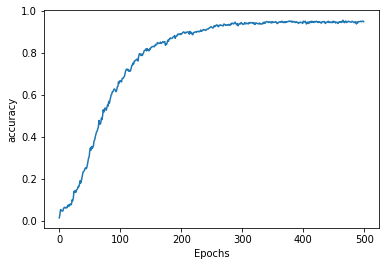

In [25]:
plot_graphs(history, 'accuracy')

In [30]:
seed_text = "James was born in London"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len, padding="pre"
    )
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


James was born in London the nolans ribbons athy one whirligig hall hall hall hall hall jeremy lanigan glisten lanigan hall hall hall hall hall hall hall hall ladies ladies ladies hearty ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies ladies
